In [1]:
%matplotlib inline
import numpy as np
from PIL import Image
from skimage import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import zscore

## 1. read image, plot single timepoint

In [2]:
p = '/home/kamil/Documents/phd2/epfl-workshop/data_zebrafish/Projections/Dre_L3_HuCGCaMP5_0_20120925_080527.corrected.projections.t1079-1178.tif'
im = io.imread(p)

In [3]:
type(im)

numpy.ndarray

In [4]:
im.shape

(100, 2048, 1440)

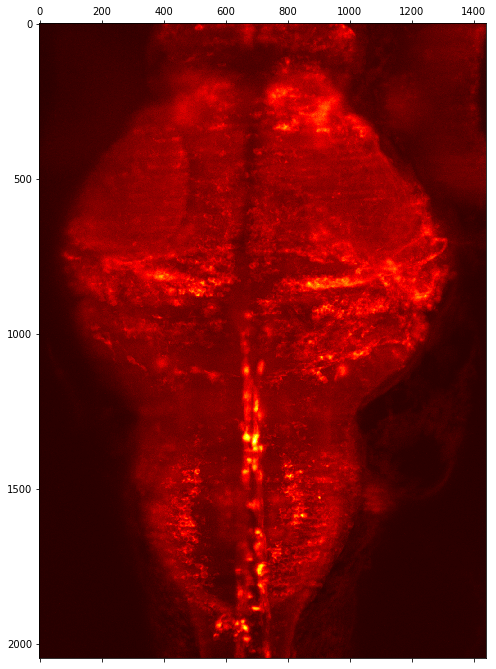

In [5]:
fig, ax = plt.subplots(figsize=(8,16))
ax.matshow(im[4,:,:], cmap='hot')

/home/kamil/Documents/envs/epfl/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/kamil/Documents/envs/epfl/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


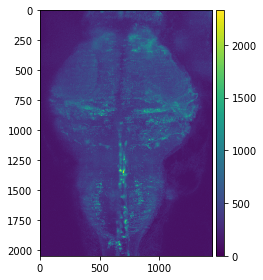

In [6]:
io.imshow(im[4,:,:])

# Work towards PCA analysis

## 2. subtract background

In [7]:
im_sb = np.copy(im)

In [8]:
im_sb[im <= 350] = 0

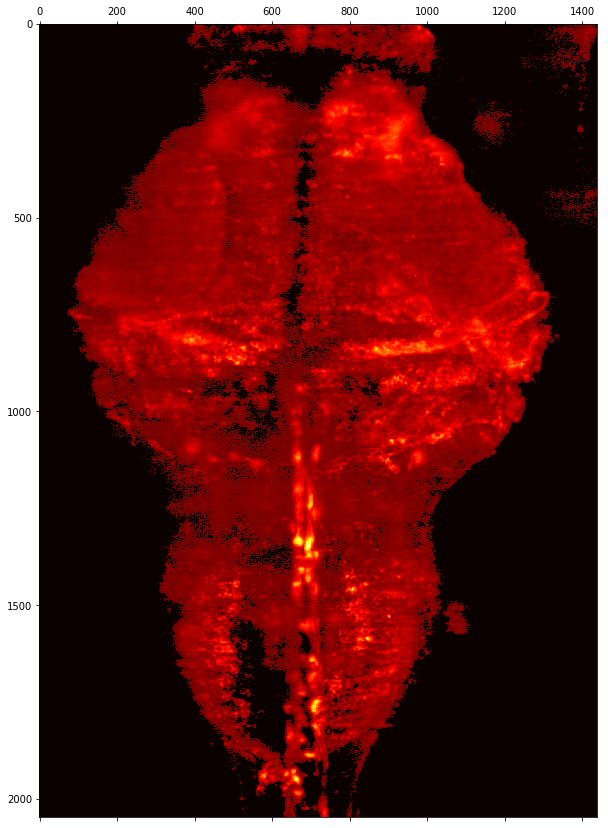

In [9]:
fig, ax = plt.subplots(figsize=(10,20))
ax.matshow(im_sb[4,:,:], cmap='hot')

### 2.1 compare before-after

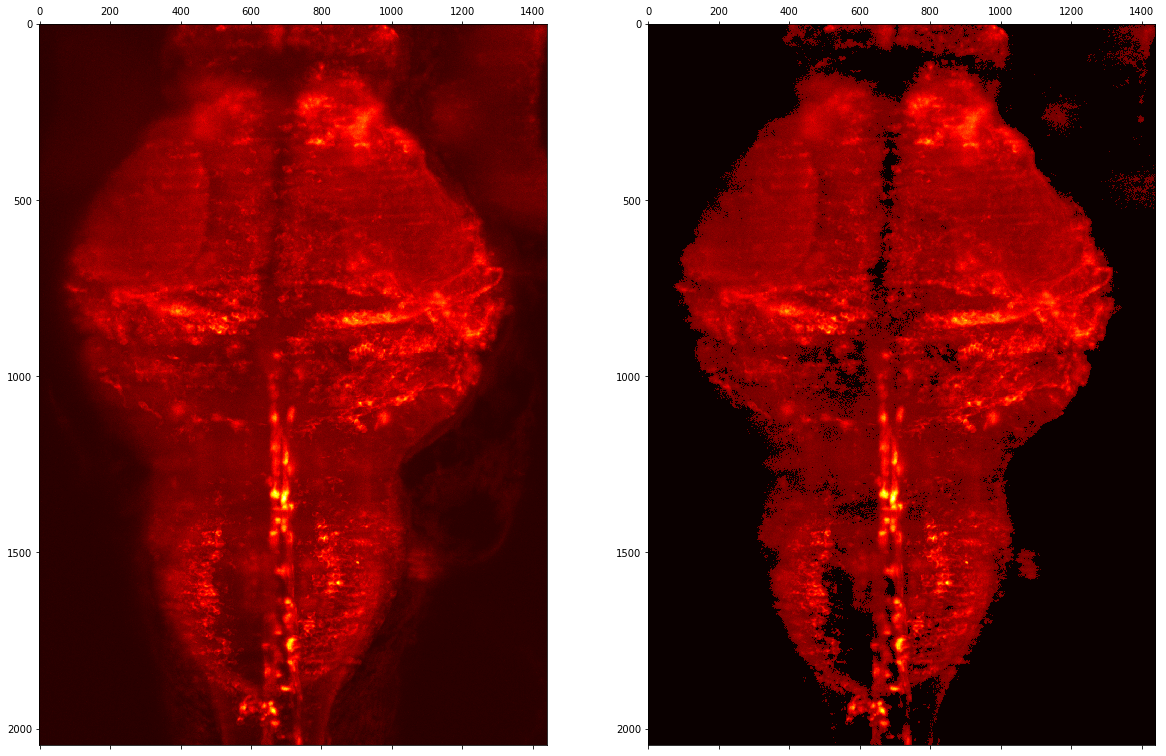

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,20))
ax1.matshow(im[4,:,:], cmap='hot')
ax2.matshow(im_sb[4,:,:], cmap='hot')

## 3. reshape to 2d

In [11]:
im2d = np.reshape(im_sb, [100, -1], order='C') # im2d = image 2d
im2d.shape

(100, 2949120)

## 4. remove pixels with zeros

### 4.1 get indices with nonzero pixels

In [12]:
inx = np.nonzero(im2d[0,:])
print(inx[0])
print(len(inx[0]))

[    401     403     404 ... 2948481 2948482 2948498]
1450599


### 4.2 get only foreground pixels

In [13]:
im2d_fg = np.zeros([100, len(inx[0])]) # fg = foreground
print(im2d_fg.shape)
for i in range(im2d.shape[0]):
    im2d_fg[i,:] = im2d[i,inx]

(100, 1450599)


In [14]:
im2d_fg.min()

0.0

## 5. normalize input

In [15]:
im2d_n = zscore(im2d_fg, axis=0) # im2d_n = image 2d normalized (double check the axis (0,1,None))
im2d_n = np.nan_to_num(im2d_n)

### 5.1 check normalization

In [16]:
im2d_n.max()

9.949874371066244

In [17]:
im2d_n.min()

-9.763033611605756

In [18]:
im2d_n.mean(axis=0) # you can play with axis=0 and axis=1 (why we have different values?)

array([ 2.22044605e-17, -1.36557432e-16,  8.51541060e-16, ...,
       -2.88657986e-17,  4.32986980e-17, -1.99840144e-17])

In [19]:
im2d_n.std(axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

## 6. clip outliers

In [20]:
im2d_n_c = np.clip(im2d_n, a_min=-3.0, a_max=3.0) # im2d_n_c = image 2d normalized, clipped

## 7. build PCA object

In [21]:
pca = PCA(n_components=10)

## 8 calculate PCA

In [22]:
pca_space = pca.fit_transform(im2d_n_c.transpose())

### 8.1 check output

In [23]:
type(pca_space)

numpy.ndarray

In [24]:
pca_space.shape

(1450599, 10)

## 9. add background pixels

In [25]:
pca_space_bg = np.zeros([2048*1440, 10]) # pca_space_bg = PCA space with background
pca_space_bg.shape

(2949120, 10)

In [26]:
for i in range(pca_space_bg.shape[1]):
    pca_space_bg[inx, i]= pca_space[:,i]

## 10. reshape back to original image size

In [27]:
pca_space_bg = pca_space_bg.reshape([2048, 1440, -1])
pca_space_bg.shape

(2048, 1440, 10)

In [28]:
pca_space_bg.min()

-8.615800425416447

In [29]:
pca_space_bg.max()

8.996346341041278

## 11. visualize principal components

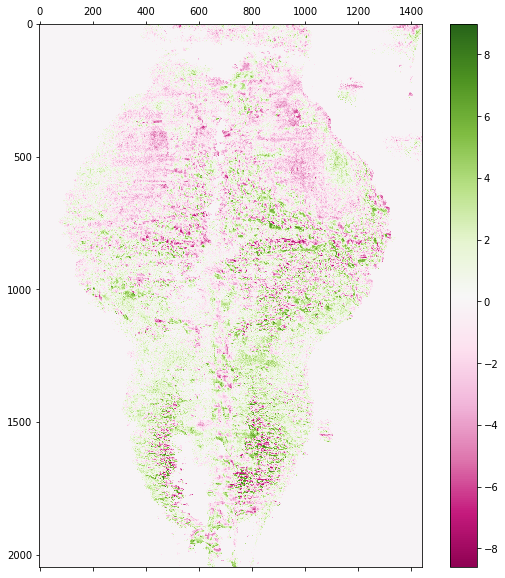

In [30]:
# single figure
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(pca_space_bg[:,:,0], cmap='PiYG')
fig.colorbar(cax)

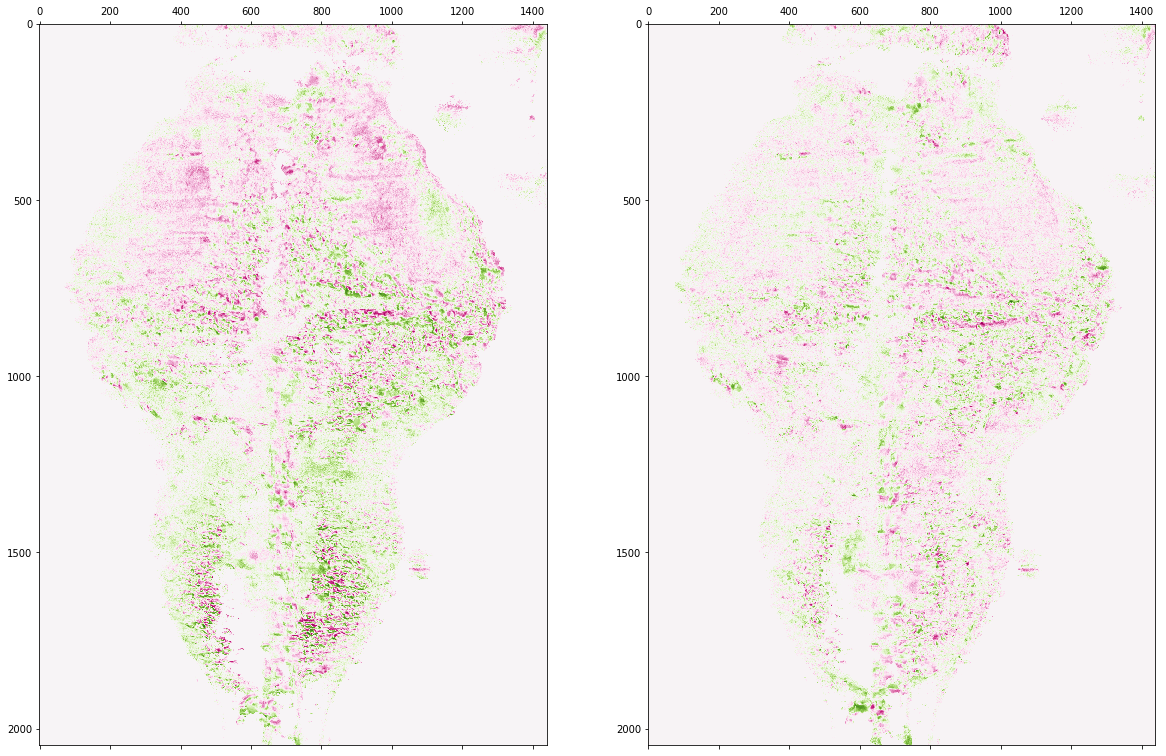

In [31]:
# three plot on one figure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,20))
cax1 = ax1.matshow(pca_space_bg[:,:,0], cmap='PiYG')
cax2 = ax2.matshow(pca_space_bg[:,:,1], cmap='PiYG')

# https://matplotlib.org/examples/color/colormaps_reference.html
# :-)

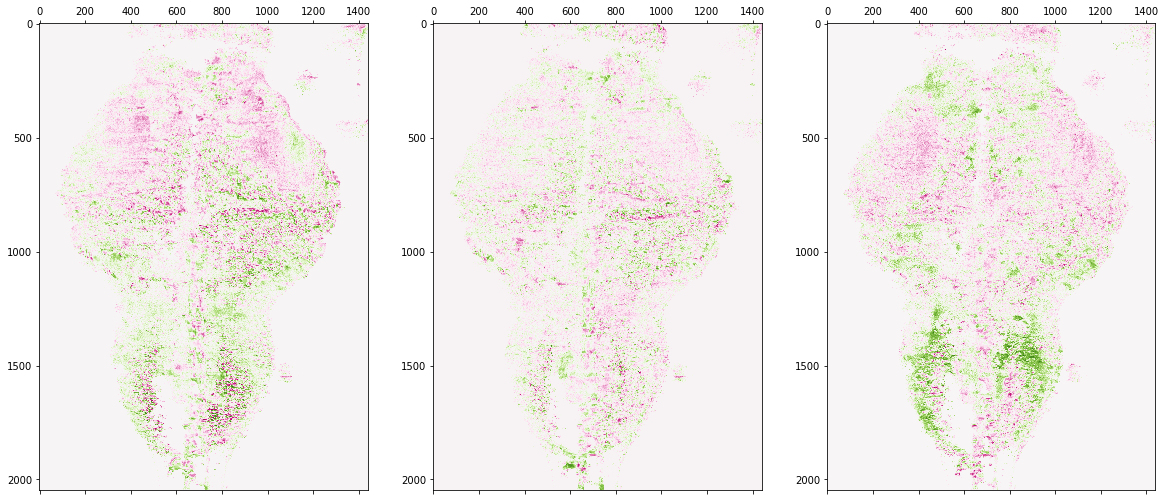

In [32]:
# three plot on one figure
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,20))
ax1.matshow(pca_space_bg[:,:,0], cmap='PiYG')
ax2.matshow(pca_space_bg[:,:,1], cmap='PiYG')
cax = ax3.matshow(pca_space_bg[:,:,2], cmap='PiYG')
#fig.colorbar(cax, orientation='horitontal')

# https://matplotlib.org/examples/color/colormaps_reference.html
# :-)

/home/kamil/Documents/envs/epfl/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


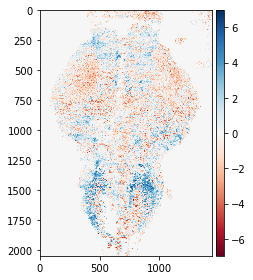

In [33]:
io.imshow(pca_space_bg[:,:,2])

## 12. check variance explained ratio

In [34]:
print(pca.components_.shape)
print(sum(pca.explained_variance_ratio_))

(10, 100)
0.22925892976214232


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text xticklabel objects>)

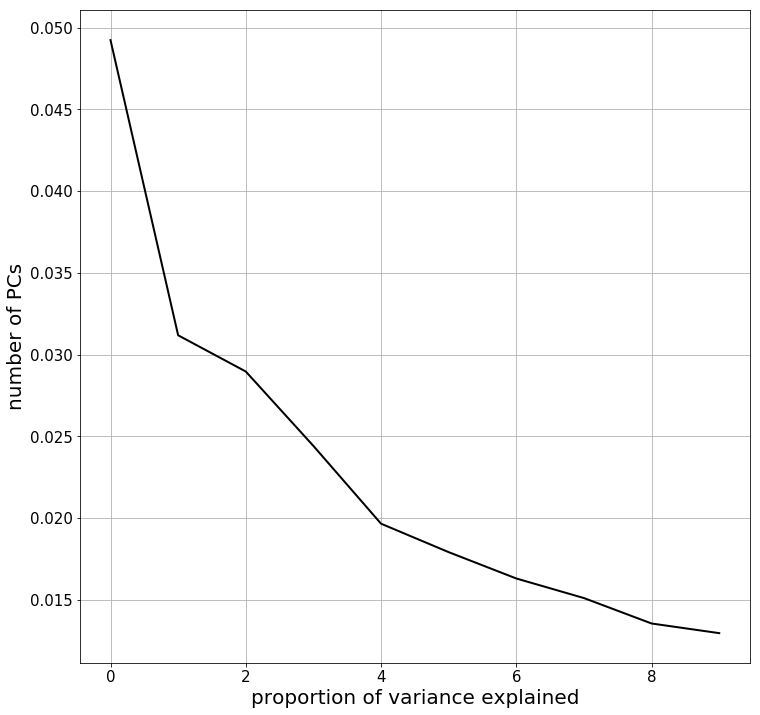

In [35]:
fig = plt.figure(figsize=(12, 12), facecolor='w')
plt.plot(pca.explained_variance_ratio_, color='black', lw=2)
plt.grid(axis='both')
plt.xlabel('proportion of variance explained', fontsize=20)
plt.ylabel('number of PCs',  fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

### end